In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

data=pd.read_csv('data/headbrain.csv')

In [2]:
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [4]:
mean_x=np.mean(X)
mean_y=np.mean(Y)

m=len(X)

numer=0
denom=0
for i in range(m):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=numer/denom
b0=mean_y-b1*mean_x

print(b1,b0)

0.263429339489 325.573421049


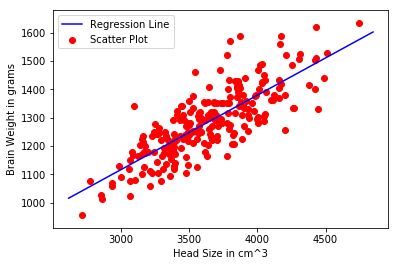

In [5]:
max_x=np.max(X)+100
min_x=np.min(X)-100

x=np.linspace(min_x,max_x,1000)
y=b0+b1*x

plt.plot(x,y,color='blue',label='Regression Line')
plt.scatter(X,Y,c='red',label='Scatter Plot')

plt.xlabel('Head Size in cm^3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [6]:
rmse=0
for i in range(m):
    y_pred=b0+b1*X[i]
    rmse+=(Y[i]-y_pred)**2
rmse=np.sqrt(rmse/m)
print(rmse)

72.1206213784


In [7]:
ss_t=0
ss_r=0
for i in range(m):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.639311719957


## Linear Regression using Scikit Learn

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=X.reshape((m,1))
reg=LinearRegression()
reg=reg.fit(X,Y)
y_pred=reg.predict(X)

mse=mean_squared_error(Y,y_pred)
rmse=np.sqrt(mse)
r2_score=reg.score(X,Y)

print(rmse)
print(r2_score)

72.1206213784
0.639311719957


## Multiple Linear Regression

In [9]:
from mpl_toolkits.mplot3d import Axes3D

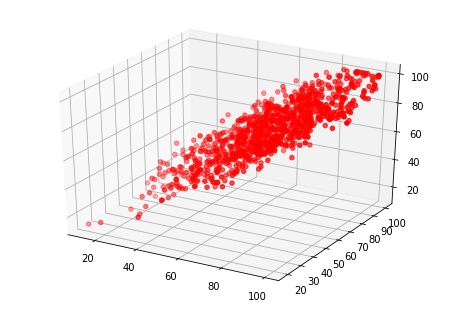

In [10]:
data=pd.read_csv('data/student.csv')

math=data['Math'].values
read=data['Reading'].values
write=data['Writing'].values

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(math,read,write,color='red')
plt.show()

In [11]:
m=len(math)
x0=np.ones(m)
X=np.array([x0,math,read]).T

In [12]:
B=np.array([0,0,0])
Y=np.array(write)
alpha=0.0001

In [13]:
def cost_function(X,Y,B):
    m=len(Y)
    J=np.sum((X.dot(B)-Y)**2/(2*m))
    return J

In [14]:
initial_cost=cost_function(X,Y,B)
print(initial_cost)

2470.11


In [15]:
def gradient_descent(X,Y,B,alpha,iterations):
    cost_history=[0]*iterations
    m=len(Y)
    for iteration in range(iterations):
        h=X.dot(B)
        loss=h-Y
        gradient=X.T.dot(loss)/m
        B=B-alpha*gradient
        cost=cost_function(X,Y,B)
        cost_history[iteration]=cost
    return B,cost_history

In [16]:
new_B,cost_history=gradient_descent(X,Y,B,alpha,100000)
print(new_B)
print(cost_history[-1])

[-0.47889172  0.09137252  0.90144884]
10.4751234735


In [17]:
def rmse(Y,y_pred):
    rmse=np.sqrt(sum((Y-y_pred)**2)/len(Y))
    return rmse

def r2_score(Y,y_pred):
    mean_y=np.mean(Y)
    ss_t=sum((Y-mean_y)**2)
    ss_r=sum((Y-y_pred)**2)
    r2=1-(ss_r/ss_t)
    return r2

y_pred=X.dot(new_B)
print(rmse(Y,y_pred))
print(r2_score(Y,y_pred))
                 

4.57714397273
0.909722327306


### Using Scikit Learn

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
X=np.array([math,read]).T
Y=np.array(write)

reg=LinearRegression()
reg=reg.fit(X,Y)
y_pred=reg.predict(X)
rmse=np.sqrt(mean_squared_error(Y,y_pred))
r2=reg.score(X,Y)
print(rmse)
print(r2)

4.57288705184
0.909890172672
